In [4]:
# !pip install matplotlib

In [18]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

## MNIST Dataset

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_test=x_test.astype('float32')
x_train=x_train.astype('float32')
mean=np.mean(x_train)
std=np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

print("counts of x_train : {}, y_train : {}, x_test : {}, y_test : {}".format(
    len(x_train), len(y_train), len(x_test), len(y_test)))

counts of x_train : 60000, y_train : 60000, x_test : 10000, y_test : 10000


In [19]:
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("counts of x_train : {}, y_train : {}, x_test : {}, y_test : {}".format(
    len(x_train), len(y_train), len(x_test), len(y_test)))

counts of x_train : 60000, y_train : 60000, x_test : 10000, y_test : 10000


In [30]:
# don't change anything
optimizer = tf.keras.optimizers.legacy.SGD()
num_filter=64
num_dense=1024
drop_dense=0.7
ac='relu'
learningrate=0.001

with tf.device("/cpu:0"):
    model = Sequential()

    model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1),padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

    model.add(Flatten())                        
    model.add(Dense(num_dense, activation=ac))
    model.add(BatchNormalization())
    model.add(Dropout(drop_dense))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)


In [31]:
cpu_list=[]
batch_sizes = []
with tf.device("/cpu:0"):
    for i in range(0,10):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        cpu_list.append(int(t2-t1))
        batch_sizes.append(k)

batch size 8
7500/7500 [==============================] - 196s 26ms/step - loss: 0.2405 - accuracy: 0.9320 - val_loss: 0.0450 - val_accuracy: 0.9859
batch size 16
3750/3750 [==============================] - 145s 39ms/step - loss: 0.0708 - accuracy: 0.9795 - val_loss: 0.0195 - val_accuracy: 0.9939
batch size 32
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0188 - val_accuracy: 0.9942
batch size 64
938/938 [==============================] - 95s 101ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0163 - val_accuracy: 0.9945
batch size 128
469/469 [==============================] - 87s 186ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0158 - val_accuracy: 0.9948
batch size 256
235/235 [==============================] - 82s 350ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0160 - val_accuracy: 0.9947
batch size 512
118/118 [==============================] - 79s 666ms/step - loss: 0.0206 - accuracy: 0.993

In [36]:
gpu_list=[]
batch_sizes = []
print("gpu_list : ", gpu_list)
with tf.device("/gpu:0"):
    for i in range(0,10):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        gpu_list.append(int(t2-t1))
        batch_sizes.append(k)

gpu_list :  []
batch size 8
7500/7500 [==============================] - 159s 21ms/step - loss: 0.1259 - accuracy: 0.9686 - val_loss: 0.0326 - val_accuracy: 0.9906
batch size 16
3750/3750 [==============================] - 88s 24ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0193 - val_accuracy: 0.9937
batch size 32
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0167 - val_accuracy: 0.9951
batch size 64
938/938 [==============================] - 25s 26ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0151 - val_accuracy: 0.9958
batch size 128
469/469 [==============================] - 15s 33ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0153 - val_accuracy: 0.9956
batch size 256
235/235 [==============================] - 11s 48ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0154 - val_accuracy: 0.9954
batch size 512
118/118 [==============================] - 10s 82ms/step - loss: 0.0190 - accura

In [37]:
print(cpu_list)
print(len(cpu_list))
cpu_score = sum(cpu_list)/len(cpu_list)
cpu_score

[196, 145, 110, 94, 87, 82, 78, 76, 74, 75]
10


101.7

In [39]:
print(gpu_list)
gpu_score = sum(gpu_list)/len(gpu_list)
gpu_score

[158, 88, 44, 24, 15, 11, 9, 9, 8, 9]


37.5

In [45]:
speedup_list = [i / j for i, j in zip(cpu_list, gpu_list)]
# printing result
print ("The division list is : " + str(speedup_list))

The division list is : [1.240506329113924, 1.6477272727272727, 2.5, 3.9166666666666665, 5.8, 7.454545454545454, 8.666666666666666, 8.444444444444445, 9.25, 8.333333333333334]


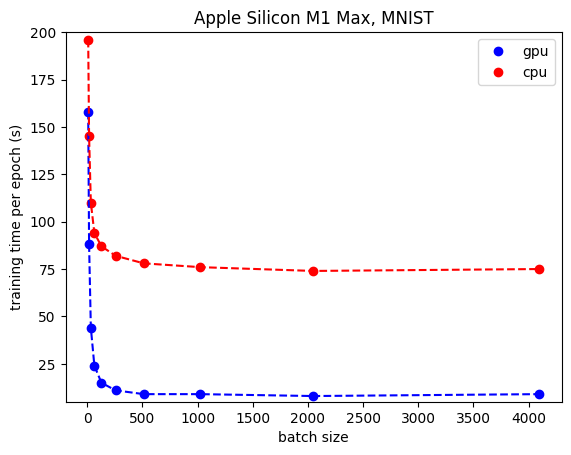

In [50]:
plt.plot(batch_sizes,gpu_list,'bo')
plt.plot(batch_sizes,cpu_list,'ro')
plt.plot(batch_sizes,gpu_list,'b--')
plt.plot(batch_sizes,cpu_list,'r--')
plt.title('Apple Silicon M1 Max, MNIST')
plt.ylabel('training time per epoch (s)')
plt.xlabel('batch size')
plt.legend(['gpu', 'cpu'], loc='upper right')
plt.ylim([5,200])
# plt.savefig('CPUvsGPU.png') 
plt.show()

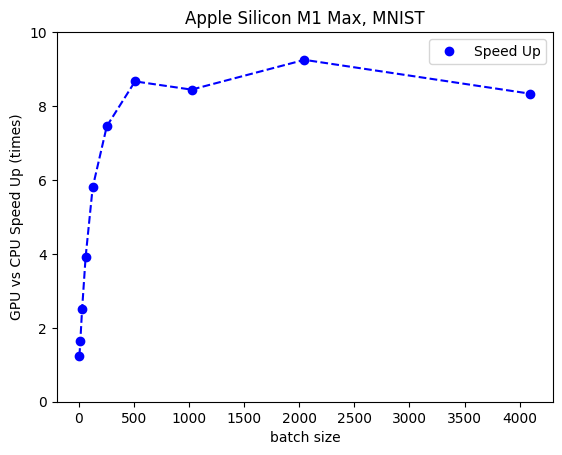

In [51]:
plt.plot(batch_sizes,speedup_list,'bo')
plt.plot(batch_sizes,speedup_list,'b--')
plt.ylabel('GPU vs CPU Speed Up (times)')
plt.xlabel('batch size')
plt.title('Apple Silicon M1 Max, MNIST')
plt.legend(['Speed Up'], loc='upper right')
plt.ylim([0,10])
# plt.savefig('CPUvsGPU.png') 
plt.show()

## CIFAR100 Dataset

In [55]:
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model2 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model2.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [57]:
cpu_list2=[]
batch_sizes2 = []
with tf.device("/cpu:0"):
    for i in range(0,10):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model2.fit(x_train, y_train, epochs=1, batch_size=k, validation_data=(x_test, y_test))
        # model.fit(x_train, y_train, batch_size=k, epochs=1, )
        t2 = time.time()
        cpu_list2.append(int(t2-t1))
        batch_sizes2.append(k)

batch size 8
6250/6250 [==============================] - 1043s 167ms/step - loss: 4.3055 - accuracy: 0.0478 - val_loss: 4.2515 - val_accuracy: 0.0520
batch size 16
3125/3125 [==============================] - 714s 228ms/step - loss: 3.8448 - accuracy: 0.1049 - val_loss: 3.6820 - val_accuracy: 0.1401
batch size 32
1563/1563 [==============================] - 523s 335ms/step - loss: 3.4727 - accuracy: 0.1676 - val_loss: 3.4198 - val_accuracy: 0.1830
batch size 64
782/782 [==============================] - 423s 540ms/step - loss: 3.1899 - accuracy: 0.2133 - val_loss: 3.2120 - val_accuracy: 0.2292
batch size 128
391/391 [==============================] - 377s 963ms/step - loss: 2.9638 - accuracy: 0.2598 - val_loss: 3.1244 - val_accuracy: 0.2419
batch size 256
196/196 [==============================] - 368s 2s/step - loss: 2.7741 - accuracy: 0.2926 - val_loss: 2.9868 - val_accuracy: 0.2636
batch size 512
98/98 [==============================] - 330s 3s/step - loss: 2.6198 - accuracy: 0.326

In [56]:
gpu_list2=[]
batch_sizes2 = []
print("gpu_list : ", gpu_list2)
with tf.device("/gpu:0"):
    for i in range(0,10):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model2.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        gpu_list2.append(int(t2-t1))
        batch_sizes2.append(k)

gpu_list :  []
batch size 8
6250/6250 [==============================] - 317s 50ms/step - loss: 5.4304 - accuracy: 0.0168 - val_loss: 5.7169 - val_accuracy: 0.0170
batch size 16
3125/3125 [==============================] - 162s 51ms/step - loss: 4.2832 - accuracy: 0.0522 - val_loss: 3.9389 - val_accuracy: 0.0942
batch size 32
1563/1563 [==============================] - 89s 56ms/step - loss: 3.7223 - accuracy: 0.1224 - val_loss: 3.6803 - val_accuracy: 0.1309
batch size 64
782/782 [==============================] - 53s 67ms/step - loss: 3.3073 - accuracy: 0.1906 - val_loss: 3.2296 - val_accuracy: 0.2117
batch size 128
391/391 [==============================] - 43s 107ms/step - loss: 2.9484 - accuracy: 0.2562 - val_loss: 2.9695 - val_accuracy: 0.2585
batch size 256
196/196 [==============================] - 38s 184ms/step - loss: 2.6420 - accuracy: 0.3197 - val_loss: 2.8546 - val_accuracy: 0.2858
batch size 512
98/98 [==============================] - 39s 378ms/step - loss: 2.3909 - accu

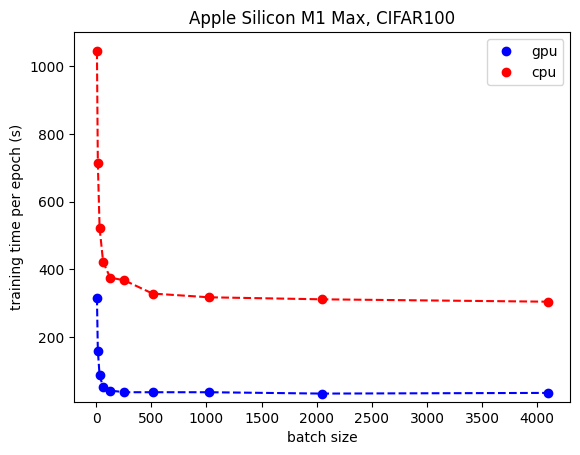

In [63]:
plt.plot(batch_sizes2,gpu_list2,'bo')
plt.plot(batch_sizes2,cpu_list2,'ro')
plt.plot(batch_sizes2,gpu_list2,'b--')
plt.plot(batch_sizes2,cpu_list2,'r--')
plt.title('Apple Silicon M1 Max, CIFAR100')
plt.ylabel('training time per epoch (s)')
plt.xlabel('batch size')
plt.legend(['gpu', 'cpu'], loc='upper right')
plt.ylim([10,1100])
# plt.savefig('CPUvsGPU.png') 
plt.show()

In [67]:
speedup_list2 = [i / j for i, j in zip(cpu_list2, gpu_list2)]
# printing result
print ("The 2nd division list is : " + str(speedup_list2))

The 2nd division list is : [3.2902208201892744, 4.434782608695652, 5.943181818181818, 7.962264150943396, 8.744186046511627, 9.68421052631579, 8.657894736842104, 8.368421052631579, 9.176470588235293, 8.472222222222221]


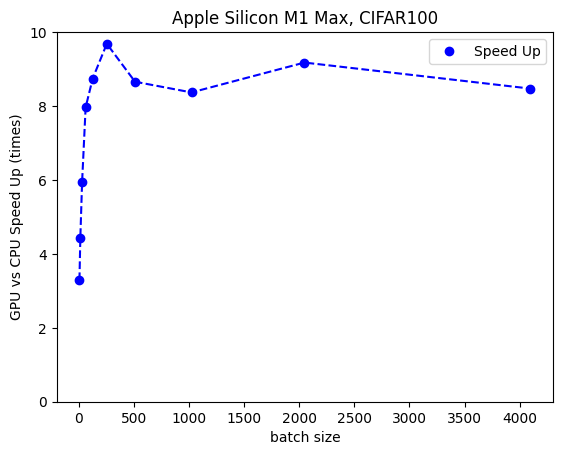

In [77]:
import math
x=[math.log2(i) for i in batch_sizes2]
plt.plot(batch_sizes2,speedup_list2,'bo')
plt.plot(batch_sizes2,speedup_list2,'b--')
plt.ylabel('GPU vs CPU Speed Up (times)')
plt.xlabel('batch size')
plt.title('Apple Silicon M1 Max, CIFAR100')
plt.legend(['Speed Up'], loc='upper right')
plt.ylim([0,10])
# plt.savefig('CPUvsGPU.png') 
plt.show()

In [2]:
import os

os.getcwd()

'/Users/COR1CC'

In [3]:
import os
# manual set of directory
# c.NotebookApp.notebook_dir = os.path.expanduser('/Users/COR1CC/CodeProjects/Python/')
os.chdir ('/Users/COR1CC/CodeProjects/Python/')
os.listdir()

['helloworld_gee_folium.ipynb',
 'helloworld-geemap.ipynb',
 '.ipynb_checkpoints',
 'cpu_vs_gpu.ipynb',
 'data']